In [71]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [72]:
df = pd.read_csv('/content/drive/MyDrive/src_2hw/orders.csv')
products_df = pd.read_csv('/content/drive/MyDrive/src_2hw/products.csv')
regions_df = pd.read_csv('/content/drive/MyDrive/src_2hw/regions.csv')
stores_df = pd.read_csv('/content/drive/MyDrive/src_2hw/stores.csv')

In [73]:
df.head()

,Unnamed: 0,store_id,order_id,product_id,price,profit,delivery_distance,date_create,order_start_prepare,planned_prep_time,order_ready,order_pickup,region_id,status_id
0,0,5014,20562761,41,7.04,45.504,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,05-09-2024 16:00:00,683,F
1,1,5014,20562761,31,23.45,45.504,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,05-09-2024 16:00:00,683,F
2,2,3856,20562753,7,51.94,30.336,1368,2024-09-05 15:25:12,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,05-09-2024 16:03:50,683,F
3,3,3856,20562753,4,188.84,30.336,1368,2024-09-05 15:25:12,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,05-09-2024 16:03:50,683,F
4,4,10825,20562723,12,85.99,43.608,459,2024-09-05 15:23:32,2024-09-05 15:23:44,20.0,2024-09-05 15:38:38,05-09-2024 16:06:38,683,F


In [74]:
df = df.drop(['Unnamed: 0'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   store_id             20000 non-null  int64  
 1   order_id             20000 non-null  int64  
 2   product_id           20000 non-null  int64  
 3   price                20000 non-null  float64
 4   profit               17911 non-null  float64
 5   delivery_distance    20000 non-null  int64  
 6   date_create          19986 non-null  object 
 7   order_start_prepare  18010 non-null  object 
 8   planned_prep_time    20000 non-null  float64
 9   order_ready          17999 non-null  object 
 10  order_pickup         20000 non-null  object 
 11  region_id            20000 non-null  int64  
 12  status_id            20000 non-null  object 
dtypes: float64(3), int64(5), object(5)
memory usage: 2.0+ MB


In [75]:
df['order_start_prepare'] = pd.to_datetime(df['order_start_prepare'])
df['order_ready'] = pd.to_datetime(df['order_ready'])

In [76]:
df.isna().sum()

,0
store_id,0
order_id,0
product_id,0
price,0
profit,2089
delivery_distance,0
date_create,14
order_start_prepare,1990
planned_prep_time,0
order_ready,2001


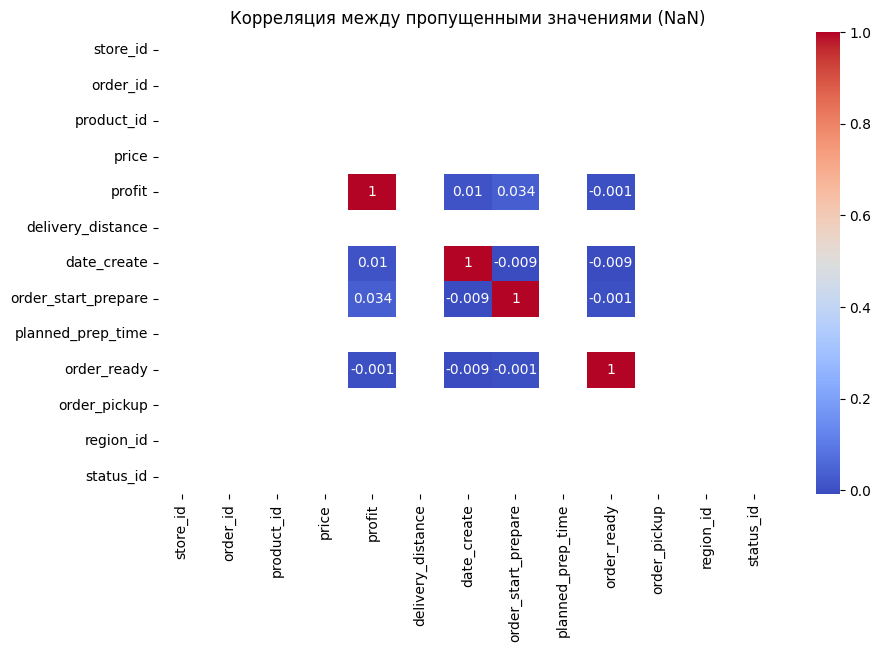

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

nan_indicators = df.isna().astype(int)
nan_corr = round(nan_indicators.corr(), 3)

plt.figure(figsize=(10, 6))
sns.heatmap(nan_corr, annot=True, cmap='coolwarm')

plt.title('Корреляция между пропущенными значениями (NaN)')
plt.show()

In [78]:
import plotly.express as px

fig = px.histogram(df, x='store_id')
fig.show()

In [79]:
fig = px.histogram(df, x='order_id')
fig.show()

In [80]:
fig = px.histogram(df, x='product_id')
fig.show()

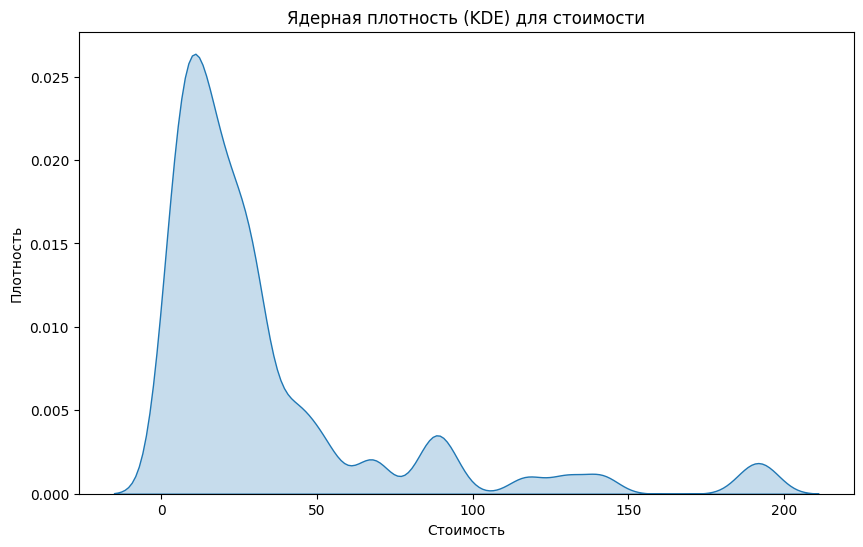

In [81]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df.price < 210].price, shade=True)
plt.title('Ядерная плотность (KDE) для стоимости')
plt.xlabel('Стоимость')
plt.ylabel('Плотность')
plt.show()

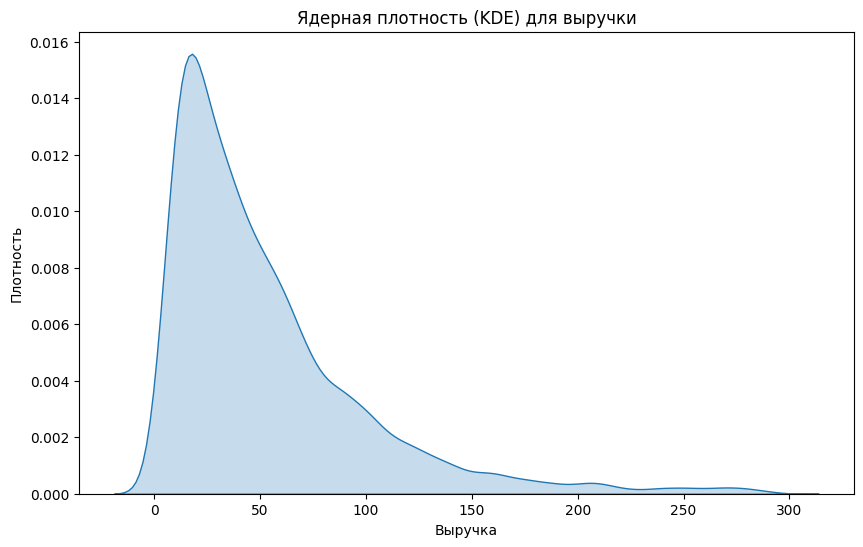

In [82]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df.profit < 300].profit, shade=True)
plt.title('Ядерная плотность (KDE) для выручки')
plt.xlabel('Выручка')
plt.ylabel('Плотность')
plt.show()

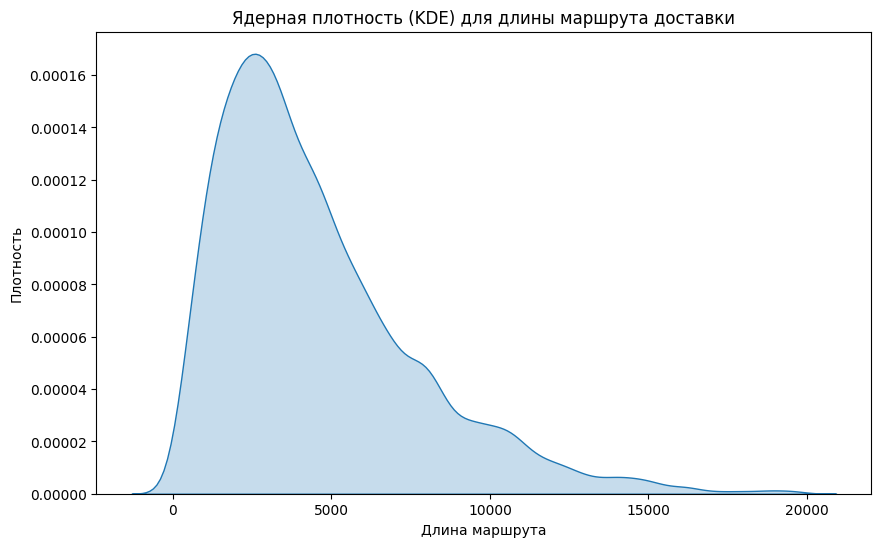

In [83]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df.delivery_distance < 20_000].delivery_distance, shade=True)
plt.title('Ядерная плотность (KDE) для длины маршрута доставки')
plt.xlabel('Длина маршрута')
plt.ylabel('Плотность')
plt.show()

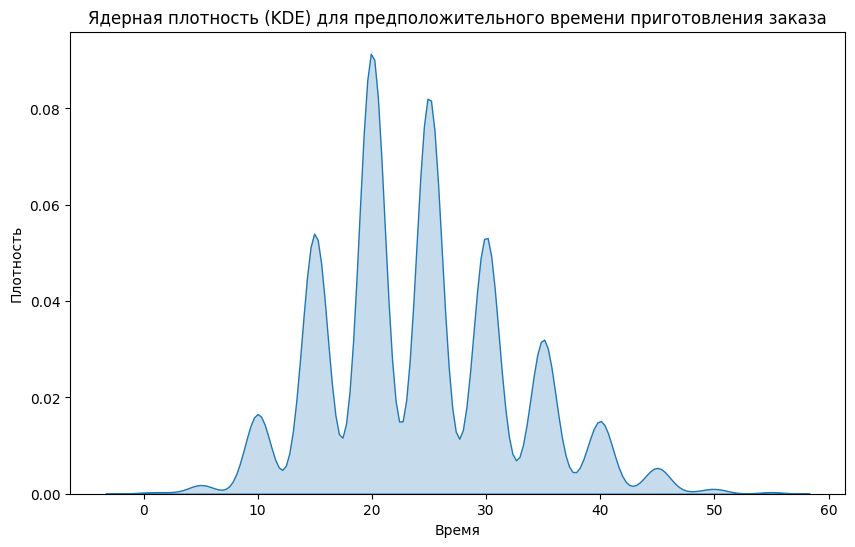

In [84]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df.planned_prep_time < 60].planned_prep_time, shade=True)
plt.title('Ядерная плотность (KDE) для предположительного времени приготовления заказа')
plt.xlabel('Время')
plt.ylabel('Плотность')
plt.show()

In [85]:
fig = px.histogram(df, 'region_id')
fig.show()

In [86]:
fig = px.histogram(df, 'status_id')
fig.show()

In [87]:
df['profit'] = df.profit.fillna(df.profit.mean())

df['date_create'] = pd.to_datetime(df['date_create'], format="%Y-%m-%d %H:%M:%S", errors='coerce')
df['order_start_prepare'] = pd.to_datetime(df['order_start_prepare'], format="%Y-%m-%d %H:%M:%S", errors='coerce')
df['date_create'] = df.date_create.fillna(method='ffill')

df['order_start_prepare'] = df.order_start_prepare.fillna(
    pd.to_datetime(df.date_create) + (df.order_start_prepare.mean() - df.date_create.mean())
    )

average_delta = (df['order_ready'] - df['order_start_prepare']).mean().total_seconds() / 60
planned_prep_time_avg = df['planned_prep_time'].mean()
total_prep_time = average_delta + planned_prep_time_avg
df['order_ready'] = df['order_ready'].fillna(
    df['order_start_prepare'] + pd.to_timedelta(total_prep_time, unit='m')
)

In [88]:
df.isna().sum()

,0
store_id,0
order_id,0
product_id,0
price,0
profit,0
delivery_distance,0
date_create,0
order_start_prepare,0
planned_prep_time,0
order_ready,0


In [89]:
def find_outliers(data, feature, threshold = 1.5):
    IQR = data[feature].quantile(0.75) - data[feature].quantile(0.25)
    low = data[feature].quantile(0.25) - (IQR * threshold)
    up = data[feature].quantile(0.75) + (IQR * threshold)
    outliers = pd.concat([data[feature] < low, data[feature] > up], axis=1)
    outliers_index = outliers.any(axis=1)
    return outliers_index

In [90]:
fig = px.box(df, y='price')
fig.show()

In [91]:
fig = px.box(df, y='profit')
fig.show()

In [92]:
fig = px.box(df, y='delivery_distance')
fig.show()

In [93]:
fig = px.box(df, y='planned_prep_time')
fig.show()

In [94]:
price_outliers = find_outliers(df, 'price')
profit_outliers = find_outliers(df, 'profit')
distance_outliers = find_outliers(df, 'delivery_distance')
time_outliers = find_outliers(df, 'planned_prep_time')

In [95]:
no_price_outliers = df['price'][~price_outliers]
no_profit_outliers = df['profit'][~profit_outliers]
no_distance_outliers = df['delivery_distance'][~distance_outliers]
no_time_outliers = df['planned_prep_time'][~time_outliers]

In [96]:
fig = px.box(no_price_outliers, y='price')
fig.show()

In [97]:
fig = px.box(no_profit_outliers, y='profit')
fig.show()

In [98]:
fig = px.box(no_distance_outliers, y='delivery_distance')
fig.show()

In [99]:
fig = px.box(no_time_outliers, y='planned_prep_time')
fig.show()

In [100]:
df.loc[price_outliers, 'price'] = df['price'].mode()
df.loc[profit_outliers, 'profit'] = df['profit'].mode()
df.loc[distance_outliers, 'delivery_distance'] = df['delivery_distance'].mode()
df.loc[time_outliers, 'planned_prep_time'] = df['planned_prep_time'].mean()

In [101]:
stores_map = stores_df.set_index('store_id')['store_name'].to_dict()
df['store_name'] = df['store_id'].map(stores_map)

In [102]:
products_map = products_df.set_index('product_id')['product_name'].to_dict()
df['product_name'] = df['product_id'].map(products_map)

In [103]:
regions_map = regions_df.set_index('region_id')['delivery_region_name'].to_dict()
df['region_name'] = df['region_id'].map(regions_map)

In [104]:
df['items_count'] = df.groupby('date_create')['product_name'].transform('count')
df['order_price'] = df.groupby('date_create')['price'].transform('sum')

In [105]:
df = df.drop('price', axis=1)

In [106]:
fig = px.histogram(df, x='product_name')
fig.show()

In [107]:
df = df.drop('product_id', axis=1)
df = df.drop_duplicates()

In [108]:
df['day_of_week'] = df['order_start_prepare'].dt.day_name()
df['hour_start'] = df['order_start_prepare'].dt.hour
df['minutes_start'] = df['order_start_prepare'].dt.minute

In [109]:
df.describe()

,store_id,order_id,profit,delivery_distance,date_create,order_start_prepare,planned_prep_time,order_ready,region_id,items_count,order_price,hour_start,minutes_start
count,19644.000000,1.964400e+04,18348.000000,18972.000000,19644,19644,19644.000000,19644,19644.000000,19644.000000,19644.000000,19644.000000,19644.000000
mean,6712.928019,2.054895e+07,44.438429,4214.166878,2024-09-04 13:21:02.575341056,2024-09-04 13:23:17.965831424,23.977358,2024-09-04 13:47:53.451219968,690.634189,3.900886,62.908273,15.182906,29.348096
min,3053.000000,2.053583e+07,0.979600,6.000000,2024-09-03 15:01:24,2024-09-03 15:02:04,5.000000,2024-09-03 15:10:42,683.000000,1.000000,0.000000,0.000000,0.000000
25%,3970.000000,2.054205e+07,20.145000,2190.000000,2024-09-03 21:49:21.500000,2024-09-03 21:50:54.500000,20.000000,2024-09-03 22:13:08,683.000000,2.000000,29.970000,12.000000,15.000000
50%,5955.000000,2.054898e+07,40.937800,3638.000000,2024-09-04 14:22:51,2024-09-04 14:25:10.500000,25.000000,2024-09-04 14:49:13.500000,685.000000,3.000000,53.390000,16.000000,29.000000
75%,9321.500000,2.055534e+07,57.275000,5785.250000,2024-09-04 21:21:04,2024-09-04 21:22:24.899613696,30.000000,2024-09-04 21:44:31,695.000000,5.000000,85.192500,19.000000,44.000000
max,11963.000000,2.056276e+07,130.350000,11857.000000,2024-09-05 15:25:25,2024-09-05 15:25:33,45.000000,2024-09-05 15:55:01.791702998,717.000000,16.000000,394.630000,23.000000,59.000000
std,2835.596691,7.729908e+03,28.708131,2630.758126,NaN,NaN,7.850355,NaN,9.831237,2.242468,45.237314,5.297089,17.213046


In [110]:
fig = px.histogram(df, x='store_name')
fig.show()

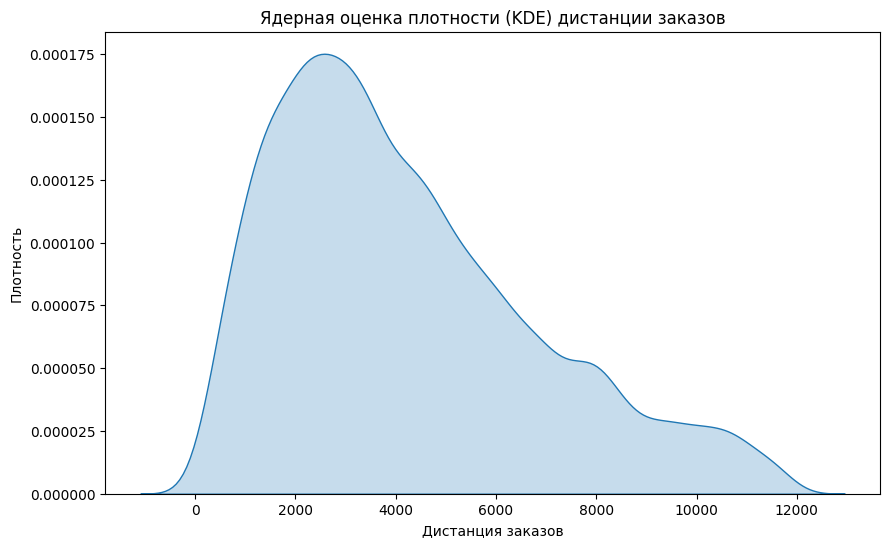

In [111]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df.delivery_distance, shade = True)
plt.title('Ядерная оценка плотности (KDE) дистанции заказов')
plt.xlabel('Дистанция заказов')
plt.ylabel('Плотность')
plt.show()

In [112]:
fig = px.histogram(df, x='hour_start')
fig.show()

In [113]:
fig = px.histogram(df, x='minutes_start')
fig.show()

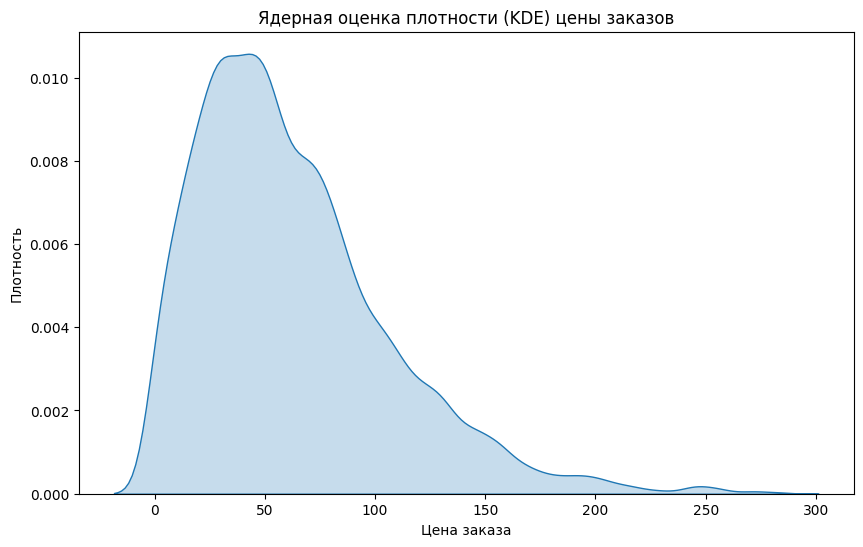

In [114]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df.order_price < 300].order_price, shade = True)
plt.title('Ядерная оценка плотности (KDE) цены заказов')
plt.xlabel('Цена заказа')
plt.ylabel('Плотность')
plt.show()

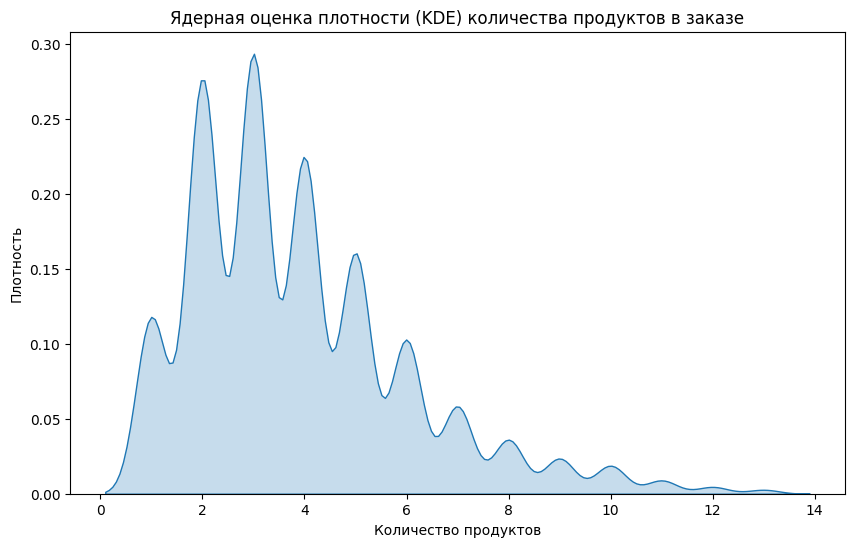

In [115]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df.items_count < 15.0].items_count, shade = True)
plt.title('Ядерная оценка плотности (KDE) количества продуктов в заказе')
plt.xlabel('Количество продуктов')
plt.ylabel('Плотность')
plt.show()

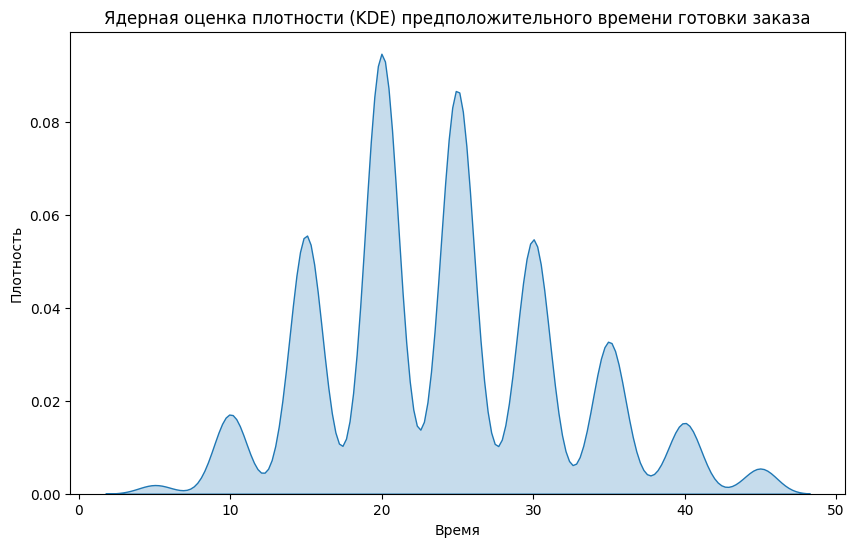

In [116]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df.planned_prep_time, shade = True)
plt.title('Ядерная оценка плотности (KDE) предположительного времени готовки заказа')
plt.xlabel('Время')
plt.ylabel('Плотность')
plt.show()

In [117]:
fig = px.histogram(df, x='region_name')
fig.show()

In [118]:
fig = px.histogram(df, x='day_of_week')
fig.show()

In [119]:
df = df.drop(['store_name', 'product_name', 'region_name'], axis = 1)
df = df.drop_duplicates()

In [120]:
import numpy as np

df['hour_start_sin'] = np.sin(2 * np.pi * df['hour_start'] / 24)
df['hour_start_cos'] = np.cos(2 * np.pi * df['hour_start'] / 24)

In [121]:
df['prepared_on_time'] = ((df['order_ready'] - df['order_start_prepare']).dt.total_seconds() / 60) <= df['planned_prep_time'] + 5

In [122]:
df.value_counts()

store_id  order_id  profit  delivery_distance  date_create          order_start_prepare            planned_prep_time  order_ready          order_pickup         region_id  status_id  items_count  order_price  day_of_week  hour_start  minutes_start  hour_start_sin  hour_start_cos  prepared_on_time
3053      20535945  33.180  6615.0             2024-09-03 15:08:25  2024-09-03 15:17:42.000000000  30.0               2024-09-03 15:44:10  03-09-2024 16:12:10  683        F          3            38.47        Tuesday      15          17             -0.707107       -0.707107       True                1
8717      20547679  10.112  4964.0             2024-09-04 13:13:55  2024-09-04 13:47:36.000000000  10.0               2024-09-04 14:02:50  04-09-2024 14:30:50  683        F          2            42.76        Wednesday    13          47             -0.258819       -0.965926       False               1
          20547617  3.081   4991.0             2024-09-04 13:10:31  2024-09-04 13:10:39.000000000  10.0               2024-09-04 13:37:52  04-09-2024 14:05:52  683        F          2            13.30        Wednesday    13          10             -0.258819       -0.965926       False               1
          20547427  17.696  4991.0             2024-09-04 13:09:40  2024-09-04 13:10:05.000000000  15.0               2024-09-04 13:37:41  04-09-2024 14:05:41  683        F          3            69.18        Wednesday    13          10             -0.258819       -0.965926       False               1
          20547379  5.609   1237.0             2024-09-04 13:09:37  2024-09-04 13:11:05.532818176  15.0               2024-09-04 13:33:57  04-09-2024 14:01:57  683        F          4            32.96        Wednesday    13          11             -0.258819       -0.965926       False               1
                                                                                                                                                                                                                                                                                                           ..
4748      20542971  18.565  4819.0             2024-09-03 23:13:07  2024-09-03 23:19:29.000000000  20.0               2024-09-03 23:23:36  03-09-2024 23:51:36  707        F          2            16.74        Tuesday      23          19             -0.258819        0.965926       True                1
          20542847  12.008  7588.0             2024-09-03 23:01:06  2024-09-03 23:09:41.000000000  20.0               2024-09-03 23:29:41  03-09-2024 23:57:41  707        F          3            100.09       Tuesday      23          9              -0.258819        0.965926       True                1
          20542245  36.024  2071.0             2024-09-03 22:03:08  2024-09-03 22:03:13.000000000  25.0               2024-09-03 22:16:16  03-09-2024 22:44:16  707        F          2            14.02        Tuesday      22          3              -0.500000        0.866025       True                1
          20541963  20.145  2100.0             2024-09-03 21:40:41  2024-09-03 21:42:09.532818176  15.0               2024-09-03 21:45:25  03-09-2024 22:13:25  707        F          2            34.42        Tuesday      21          42             -0.707107        0.707107       True                1
11963     20547801  35.471  579.0              2024-09-04 13:20:34  2024-09-04 13:57:18.000000000  10.0               2024-09-04 14:11:19  04-09-2024 14:39:19  697        F          4            54.88        Wednesday    13          57             -0.258819       -0.965926       True                1
Name: count, Length: 7306, dtype: int64

In [123]:
df_numeric = df.select_dtypes(include=['number']).copy()
df_numeric = pd.concat([df_numeric, df[['prepared_on_time']]], axis = 1)
corr = df_numeric.corr()
corr.style.background_gradient(cmap='coolwarm')

,store_id,order_id,profit,delivery_distance,planned_prep_time,region_id,items_count,order_price,hour_start,minutes_start,hour_start_sin,hour_start_cos,prepared_on_time
store_id,1.000000,-0.018342,-0.056169,0.014139,-0.203985,0.109412,-0.116300,-0.094041,0.021636,-0.011869,-0.016826,0.067869,0.004526
order_id,-0.018342,1.000000,-0.037085,-0.021657,-0.025495,-0.010697,-0.042579,-0.024900,-0.195707,0.025465,0.303906,-0.214204,0.009734
profit,-0.056169,-0.037085,1.000000,0.077396,0.261972,-0.152843,0.281252,0.212068,0.084126,0.006945,-0.112195,0.026532,0.004028
delivery_distance,0.014139,-0.021657,0.077396,1.000000,0.030916,-0.170098,0.079871,0.052151,0.002109,-0.002143,0.001242,0.055903,-0.069645
planned_prep_time,-0.203985,-0.025495,0.261972,0.030916,1.000000,-0.132753,0.203875,0.157437,0.027716,0.017590,-0.034057,-0.035573,0.050856
region_id,0.109412,-0.010697,-0.152843,-0.170098,-0.132753,1.000000,-0.015150,-0.009921,0.023283,0.005712,-0.013053,0.063519,0.021543
items_count,-0.116300,-0.042579,0.281252,0.079871,0.203875,-0.015150,1.000000,0.799381,0.056325,-0.001933,-0.088807,0.059564,-0.030126
order_price,-0.094041,-0.024900,0.212068,0.052151,0.157437,-0.009921,0.799381,1.000000,0.053599,-0.009303,-0.068739,0.050581,-0.024450
hour_start,0.021636,-0.195707,0.084126,0.002109,0.027716,0.023283,0.056325,0.053599,1.000000,-0.016530,-0.748978,0.289793,0.023655
minutes_start,-0.011869,0.025465,0.006945,-0.002143,0.017590,0.005712,-0.001933,-0.009303,-0.016530,1.000000,0.025894,-0.049104,-0.019058


In [127]:
!pip install phik -q
import phik
from phik.report import plot_correlation_matrix

interval columns not set, guessing: ['store_id', 'order_id', 'profit', 'delivery_distance', 'planned_prep_time', 'region_id', 'items_count', 'order_price', 'hour_start', 'minutes_start', 'hour_start_sin', 'hour_start_cos']


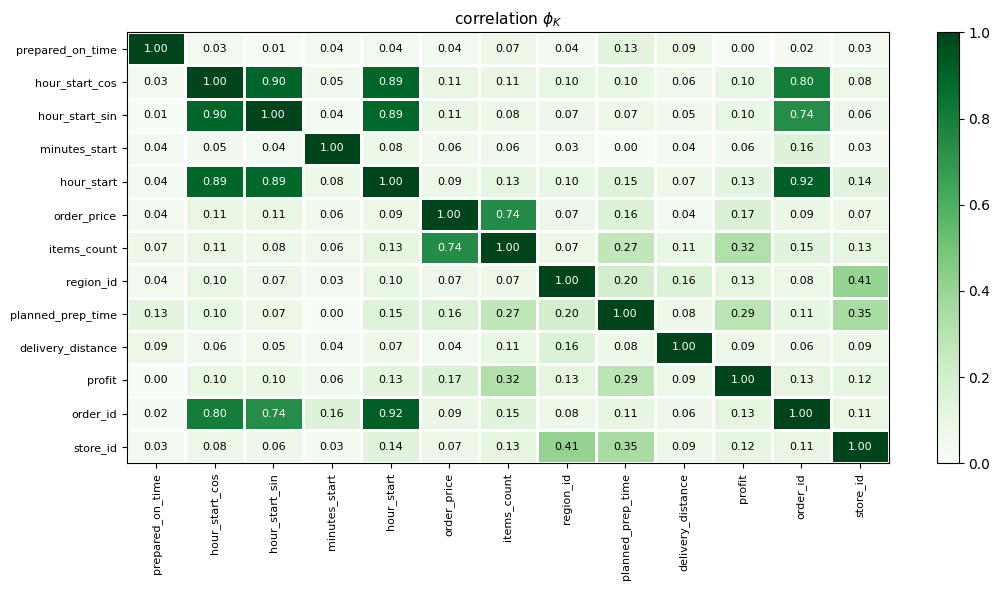

In [128]:
phik_overview = df_numeric.phik_matrix()
plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"correlation $\phi_K$",
                        fontsize_factor=0.8, figsize=(11, 6))
plt.tight_layout()